In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn import preprocessing

In [3]:
os.chdir('K:\python\ipl')
path = os.getcwd()
players = pd.read_csv(path+'\iplallmatches.csv')

In [4]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193426 entries, 0 to 193425
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    193426 non-null  int64  
 1   id            193426 non-null  int64  
 2   innings       193426 non-null  int64  
 3   overs         193426 non-null  float64
 4   batting_team  193426 non-null  object 
 5   bowling_team  193426 non-null  object 
 6   strike        193426 non-null  object 
 7   nonstrike     193426 non-null  object 
 8   bowler        193426 non-null  object 
 9   runs          193426 non-null  float64
 10  extras        193426 non-null  float64
 11  wicket_type   9512 non-null    object 
 12  batsmen_out   9512 non-null    object 
 13  date          193426 non-null  object 
 14  venue         193426 non-null  object 
 15  city          193426 non-null  object 
 16  winner        193426 non-null  object 
 17  year          193426 non-null  int64  
 18  over

In [5]:
players['venue'] = players.venue.apply(lambda x: x.strip())

In [6]:
players['venue'] = players.venue.replace('M Chinnaswamy Stadium','M.Chinnaswamy Stadium')

In [7]:
ground = players.groupby(['venue','id','innings']).agg({'runs':'sum'}).reset_index()

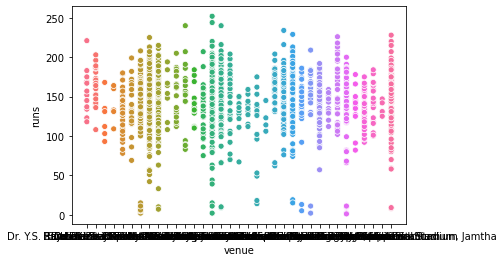

In [8]:
sns.scatterplot(data=ground,y = 'runs',x='venue', hue = 'venue' , legend = False)

In [9]:
ground = ground.astype({'innings': 'int32'})
ground = ground.astype({'venue': 'str'})

In [10]:
ground = ground[ground.innings < 3]

In [11]:
ground.venue.unique()

array(['Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park',
       'De Beers Diamond Oval', 'Dr DY Patil Sports Academy',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...',
       'Dubai International Cricket Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Green Park',
       'Himachal Pradesh Cricket Association Stadium',
       'Holkar Cricket Stadium', 'JSCA International Stadium Complex',
       'Kingsmead', 'M.Chinnaswamy Stadium',
       'MA Chidambaram Stadium, Chepauk',
       'Maharashtra Cricket Association Stadium', 'Nehru Stadium',
       'New Wanderers Stadium', 'Newlands', 'OUTsurance Oval',
       'Punjab Cricket Association IS Bindra Stadium, ...',
       'Punjab Cricket Association Stadium, Mohali',
       'Rajiv Gandhi International Stadium, Uppal',
       'Sardar Patel Stadium, Motera',
       'Saurashtra Cricket Association Stadium', 'Sawai Mansingh Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'Sharjah Cricket Stadiu

In [12]:
groundinfo = ground.groupby(['id','innings','venue']).agg({'runs':'sum'}).reset_index()

In [13]:
groundinfo

,id,innings,venue,runs
0,1,1,M.Chinnaswamy Stadium,205.0
1,1,2,M.Chinnaswamy Stadium,63.0
2,2,1,"Punjab Cricket Association Stadium, Mohali",234.0
3,2,2,"Punjab Cricket Association Stadium, Mohali",196.0
4,3,1,Feroz Shah Kotla,122.0
...,...,...,...,...
1623,812,2,Sheikh Zayed Stadium,122.0
1624,813,1,Sheikh Zayed Stadium,181.0
1625,813,2,Sheikh Zayed Stadium,166.0
1626,814,1,Dubai International Cricket Stadium,152.0


In [14]:
id_runs = pd.pivot_table(groundinfo,values = 'runs', index = 'id', columns ='innings').reset_index()

In [15]:
id_runs.columns = ['id','firstinn_runs','secondinn_runs']

In [16]:
id_runs['sum'] =  id_runs.firstinn_runs + id_runs.secondinn_runs

In [17]:
id_runs

,id,firstinn_runs,secondinn_runs,sum
0,1,205.0,63.0,268.0
1,2,234.0,196.0,430.0
2,3,122.0,122.0,244.0
3,4,154.0,161.0,315.0
4,5,100.0,84.0,184.0
...,...,...,...,...
809,810,191.0,196.0,387.0
810,811,196.0,137.0,333.0
811,812,127.0,122.0,249.0
812,813,181.0,166.0,347.0


In [18]:
matchinfo = players.groupby(['id','innings','batting_team','bowling_team','year']).agg({'runs':'sum','extras':'sum','wicket_type':'count'}).reset_index()

In [19]:
runsinfo = pd.DataFrame(players.groupby(['id','innings','strike','bowler','year'])['runs'].apply(lambda x : x.value_counts())).reset_index()

In [20]:
wicketsinfo = pd.DataFrame(players.groupby(['id','innings','bowler','strike','year'])['wicket_type'].apply(lambda x : x.value_counts())).reset_index()

In [21]:
wicketsinfo

,id,innings,bowler,strike,year,level_5,wicket_type
0,1,1,AA Noffke,DJ Hussey,2008,caught,1
1,1,1,JH Kallis,RT Ponting,2008,caught,1
2,1,1,Z Khan,SC Ganguly,2008,caught,1
3,1,2,AB Agarkar,B Akhil,2008,caught,1
4,1,2,AB Agarkar,CL White,2008,caught,1
...,...,...,...,...,...,...,...
9502,814,2,A Nortje,HH Pandya,2020,caught,1
9503,814,2,A Nortje,RG Sharma,2020,caught,1
9504,814,2,K Rabada,KA Pollard,2020,bowled,1
9505,814,2,MP Stoinis,Q de Kock,2020,caught,1


In [22]:
wicketsinfo = wicketsinfo[(wicketsinfo.level_5 != 'run out') & 
                          (wicketsinfo.level_5 != 'retired hurt') & (wicketsinfo.level_5 != 'obstructing the field')]

In [23]:
temp = players[(players.extras == 0)]

In [24]:
batsmensr = temp.groupby(['id','innings','year','strike']).agg({'runs':'sum','ball':'count'}).reset_index()

In [25]:
batsmensr['sr'] = batsmensr.runs * 100 / batsmensr.ball

In [26]:
batsmensr

,id,innings,year,strike,runs,ball,sr
0,1,1,2008,BB McCullum,158.0,71,222.535211
1,1,1,2008,DJ Hussey,12.0,12,100.000000
2,1,1,2008,Mohammad Hafeez,5.0,3,166.666667
3,1,1,2008,RT Ponting,20.0,19,105.263158
4,1,1,2008,SC Ganguly,10.0,10,100.000000
...,...,...,...,...,...,...,...
12166,814,2,2020,KA Pollard,9.0,4,225.000000
12167,814,2,2020,KH Pandya,1.0,1,100.000000
12168,814,2,2020,Q de Kock,20.0,11,181.818182
12169,814,2,2020,RG Sharma,68.0,51,133.333333


In [28]:
temp = batsmensr.groupby(['strike','id','innings']).agg({'runs':'sum'}).reset_index()

In [29]:
groundrate = pd.merge(temp,id_runs, on = ['id'], how = 'left')

In [30]:
groundrate

,strike,id,innings,runs,firstinn_runs,secondinn_runs,sum
0,A Ashish Reddy,286,1,10.0,95.0,91.0,186.0
1,A Ashish Reddy,292,2,3.0,152.0,146.0,298.0
2,A Ashish Reddy,299,2,8.0,163.0,133.0,296.0
3,A Ashish Reddy,313,2,10.0,119.0,119.0,238.0
4,A Ashish Reddy,316,1,4.0,122.0,120.0,242.0
...,...,...,...,...,...,...,...
12166,Z Khan,517,1,4.0,86.0,88.0,174.0
12167,Z Khan,562,2,2.0,199.0,123.0,322.0
12168,Z Khan,580,2,1.0,151.0,137.0,288.0
12169,Z Khan,619,2,2.0,193.0,63.0,256.0


In [31]:
groundrate['pt_score'] = groundrate.apply(lambda x : (x['runs'] / x['firstinn_runs']) if (x['innings'] == 1) else 
                                          (x['runs'] / x['secondinn_runs']),axis = 1).round(3)
groundrate['pm_score'] = (groundrate.runs / groundrate['sum']).round(3)

In [32]:
groundrate

,strike,id,innings,runs,firstinn_runs,secondinn_runs,sum,pt_score,pm_score
0,A Ashish Reddy,286,1,10.0,95.0,91.0,186.0,0.105,0.054
1,A Ashish Reddy,292,2,3.0,152.0,146.0,298.0,0.021,0.010
2,A Ashish Reddy,299,2,8.0,163.0,133.0,296.0,0.060,0.027
3,A Ashish Reddy,313,2,10.0,119.0,119.0,238.0,0.084,0.042
4,A Ashish Reddy,316,1,4.0,122.0,120.0,242.0,0.033,0.017
...,...,...,...,...,...,...,...,...,...
12166,Z Khan,517,1,4.0,86.0,88.0,174.0,0.047,0.023
12167,Z Khan,562,2,2.0,199.0,123.0,322.0,0.016,0.006
12168,Z Khan,580,2,1.0,151.0,137.0,288.0,0.007,0.003
12169,Z Khan,619,2,2.0,193.0,63.0,256.0,0.032,0.008


In [33]:
batsmen_score = pd.merge(batsmensr,groundrate,on = ['strike','id','innings'], how = 'left')

In [35]:
batsmen_score.head()

,id,innings,year,strike,runs_x,ball,sr,runs_y,firstinn_runs,secondinn_runs,sum,pt_score,pm_score
0,1,1,2008,BB McCullum,158.0,71,222.535211,158.0,205.0,63.0,268.0,0.771,0.590
1,1,1,2008,DJ Hussey,12.0,12,100.000000,12.0,205.0,63.0,268.0,0.059,0.045
2,1,1,2008,Mohammad Hafeez,5.0,3,166.666667,5.0,205.0,63.0,268.0,0.024,0.019
3,1,1,2008,RT Ponting,20.0,19,105.263158,20.0,205.0,63.0,268.0,0.098,0.075
4,1,1,2008,SC Ganguly,10.0,10,100.000000,10.0,205.0,63.0,268.0,0.049,0.037


In [36]:
batsmen_score = batsmen_score.drop(['runs_y','firstinn_runs','secondinn_runs','sum'],axis =1)

In [37]:
notoutinfo = players.groupby('batsmen_out')[['ball']].count().reset_index()

In [38]:
notoutinfo.columns = ['strike','nooftimesout']

In [39]:
batsmen_score = pd.merge(batsmen_score,notoutinfo,on = ['strike'],how='left')

In [40]:
batsmen_score.sort_values(by = 'strike')

,id,innings,year,strike,runs_x,ball,sr,pt_score,pm_score,nooftimesout
5075,337,2,2013,A Ashish Reddy,4.0,5,80.000000,0.033,0.014,15.0
4290,286,1,2012,A Ashish Reddy,10.0,10,100.000000,0.105,0.054,15.0
5368,356,1,2013,A Ashish Reddy,14.0,11,127.272727,0.105,0.051,15.0
5340,354,1,2013,A Ashish Reddy,36.0,16,225.000000,0.238,0.118,15.0
8105,542,1,2016,A Ashish Reddy,2.0,3,66.666667,0.011,0.005,15.0
...,...,...,...,...,...,...,...,...,...,...
9442,630,2,2017,Z Khan,1.0,1,100.000000,0.007,0.003,14.0
2826,186,2,2011,Z Khan,0.0,3,0.000000,0.000,0.000,14.0
885,59,1,2009,Z Khan,2.0,3,66.666667,0.012,0.007,14.0
8400,562,2,2016,Z Khan,2.0,4,50.000000,0.016,0.006,14.0


In [41]:
batsmen_score = batsmen_score.groupby(['strike']).agg({'runs_x':'sum',
                                       'ball':'sum',
                                       'pt_score':'mean',
                                       'pm_score':'mean'}).reset_index().rename(columns = {'runs_x':'runs','ball':'balls'})

In [42]:
batsmen_score.sort_values(by=['pt_score','pm_score'], ascending = False)

,strike,runs,balls,pt_score,pm_score
206,JM Bairstow,789.0,543,0.242857,0.125238
116,DA Warner,5205.0,3618,0.238091,0.120455
96,CH Gayle,4753.0,3099,0.233970,0.116373
297,MN van Wyk,163.0,127,0.233000,0.115800
435,SE Marsh,2473.0,1820,0.227386,0.115086
...,...,...,...,...,...
457,SS Cottrell,0.0,2,0.000000,0.000000
479,Sunny Gupta,0.0,1,0.000000,0.000000
499,U Kaul,0.0,1,0.000000,0.000000
506,V Pratap Singh,0.0,1,0.000000,0.000000


In [43]:
batsmen_score = pd.merge(batsmen_score,notoutinfo,on='strike',how='left' )

In [44]:
batsmen_score

,strike,runs,balls,pt_score,pm_score,nooftimesout
0,A Ashish Reddy,280.0,191,0.093261,0.046391,15.0
1,A Chandila,4.0,7,0.017000,0.009000,NaN
2,A Chopra,53.0,70,0.064667,0.033833,6.0
3,A Choudhary,25.0,20,0.065000,0.031000,1.0
4,A Dananjaya,4.0,5,0.022000,0.011000,NaN
...,...,...,...,...,...,...
531,YV Takawale,191.0,171,0.143900,0.070200,8.0
532,Yashpal Singh,47.0,65,0.103750,0.048000,4.0
533,Younis Khan,3.0,7,0.017000,0.008000,1.0
534,Yuvraj Singh,2742.0,2089,0.146110,0.073000,111.0


In [45]:
batsmen_score['nooftimesout'] = batsmen_score.nooftimesout.fillna(0)

In [46]:
batsmen_score['avg'] = batsmen_score.apply(lambda x : (x.runs / x.nooftimesout) if (x.nooftimesout != 0) else x.runs, axis = 1)
batsmen_score['sr_score'] = (batsmen_score.runs**2 / batsmen_score.balls) * 100

In [47]:
batsmen_score

,strike,runs,balls,pt_score,pm_score,nooftimesout,avg,sr_score
0,A Ashish Reddy,280.0,191,0.093261,0.046391,15.0,18.666667,41047.120419
1,A Chandila,4.0,7,0.017000,0.009000,0.0,4.000000,228.571429
2,A Chopra,53.0,70,0.064667,0.033833,6.0,8.833333,4012.857143
3,A Choudhary,25.0,20,0.065000,0.031000,1.0,25.000000,3125.000000
4,A Dananjaya,4.0,5,0.022000,0.011000,0.0,4.000000,320.000000
...,...,...,...,...,...,...,...,...
531,YV Takawale,191.0,171,0.143900,0.070200,8.0,23.875000,21333.918129
532,Yashpal Singh,47.0,65,0.103750,0.048000,4.0,11.750000,3398.461538
533,Younis Khan,3.0,7,0.017000,0.008000,1.0,3.000000,128.571429
534,Yuvraj Singh,2742.0,2089,0.146110,0.073000,111.0,24.702703,359912.111058


In [48]:
batsmen_score['pp_score'] = batsmen_score['avg'] + (batsmen_score['pt_score'] * batsmen_score['pm_score'] * batsmen_score['sr_score'])

In [49]:
batsmen_score.sort_values(by='pp_score', ascending = False).head(20)

,strike,runs,balls,pt_score,pm_score,nooftimesout,avg,sr_score,pp_score
116,DA Warner,5205.0,3618,0.238091,0.120455,124.0,41.975806,748812.189055,21517.259593
96,CH Gayle,4753.0,3099,0.233970,0.116373,116.0,40.974138,728977.379800,19889.453313
505,V Kohli,5872.0,4442,0.212957,0.105724,153.0,38.379085,776235.569563,17515.097219
24,AB de Villiers,4779.0,3094,0.193420,0.098236,119.0,40.159664,738165.513898,14065.880640
438,SK Raina,5353.0,3842,0.181926,0.093758,162.0,33.043210,745825.325351,12754.606940
407,S Dhawan,5170.0,4016,0.193669,0.098251,152.0,34.013158,665560.258964,12698.436070
379,RG Sharma,5202.0,3950,0.175318,0.089451,167.0,31.149701,685083.645570,10774.915932
154,G Gambhir,4197.0,3329,0.199291,0.098987,136.0,30.860294,529132.141784,10469.160147
232,KL Rahul,2651.0,1921,0.227162,0.113405,61.0,43.459016,365840.760021,9468.035425
398,RV Uthappa,4597.0,3459,0.173224,0.085770,165.0,27.860606,610939.838103,9104.906229


In [50]:
x = batsmen_score[['pp_score']].values.astype(float) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

,0
0,0.009121
1,0.000188
2,0.000819
3,0.001455
4,0.000189
...,...
531,0.011125
532,0.001333
533,0.000140
534,0.179555


In [51]:
batsmen_score = batsmen_score.join(df,how='left')

In [55]:
batsmen_score.rename(columns = {0:'norm_pp_score'},inplace= True)

In [56]:
batsmen_score.sort_values(by='pp_score', ascending = False).head(20)

,strike,runs,balls,pt_score,pm_score,nooftimesout,avg,sr_score,pp_score,norm_pp_score
116,DA Warner,5205.0,3618,0.238091,0.120455,124.0,41.975806,748812.189055,21517.259593,1.000000
96,CH Gayle,4753.0,3099,0.233970,0.116373,116.0,40.974138,728977.379800,19889.453313,0.924349
505,V Kohli,5872.0,4442,0.212957,0.105724,153.0,38.379085,776235.569563,17515.097219,0.814002
24,AB de Villiers,4779.0,3094,0.193420,0.098236,119.0,40.159664,738165.513898,14065.880640,0.653702
438,SK Raina,5353.0,3842,0.181926,0.093758,162.0,33.043210,745825.325351,12754.606940,0.592762
407,S Dhawan,5170.0,4016,0.193669,0.098251,152.0,34.013158,665560.258964,12698.436070,0.590151
379,RG Sharma,5202.0,3950,0.175318,0.089451,167.0,31.149701,685083.645570,10774.915932,0.500757
154,G Gambhir,4197.0,3329,0.199291,0.098987,136.0,30.860294,529132.141784,10469.160147,0.486547
232,KL Rahul,2651.0,1921,0.227162,0.113405,61.0,43.459016,365840.760021,9468.035425,0.440021
398,RV Uthappa,4597.0,3459,0.173224,0.085770,165.0,27.860606,610939.838103,9104.906229,0.423144


In [57]:
wicketsinfo

,id,innings,bowler,strike,year,level_5,wicket_type
0,1,1,AA Noffke,DJ Hussey,2008,caught,1
1,1,1,JH Kallis,RT Ponting,2008,caught,1
2,1,1,Z Khan,SC Ganguly,2008,caught,1
3,1,2,AB Agarkar,B Akhil,2008,caught,1
4,1,2,AB Agarkar,CL White,2008,caught,1
...,...,...,...,...,...,...,...
9501,814,1,TA Boult,SO Hetmyer,2020,caught,1
9502,814,2,A Nortje,HH Pandya,2020,caught,1
9503,814,2,A Nortje,RG Sharma,2020,caught,1
9504,814,2,K Rabada,KA Pollard,2020,bowled,1


In [62]:
wickets = wicketsinfo.groupby('bowler').agg({'wicket_type':'sum'}).reset_index()

In [63]:
bowlerinfo = players.groupby(['bowler']).agg({'ball':'count','runs':'sum'}).reset_index()

In [65]:
bowlerinfo = pd.merge(bowlerinfo,wickets,on='bowler',how='left')

In [69]:
bowlerinfo.wicket_type = bowlerinfo.wicket_type.fillna(0)

In [70]:
bowlerinfo

,bowler,ball,runs,wicket_type
0,A Ashish Reddy,270,386.0,18.0
1,A Chandila,234,242.0,11.0
2,A Choudhary,108,137.0,5.0
3,A Dananjaya,25,46.0,0.0
4,A Flintoff,66,105.0,2.0
...,...,...,...,...
414,YA Abdulla,222,294.0,15.0
415,YK Pathan,1184,1372.0,42.0
416,YS Chahal,2188,2649.0,121.0
417,Yuvraj Singh,875,1057.0,36.0


In [71]:
bowlerinfo['bow_avg'] = bowlerinfo.runs / bowlerinfo.wicket_type
bowlerinfo['bow_sr'] = bowlerinfo.ball / bowlerinfo.wicket_type
bowlerinfo['bow_eco'] = bowlerinfo.runs / (bowlerinfo.ball/6)

In [72]:
bowlerinfo

,bowler,ball,runs,wicket_type,bow_avg,bow_sr,bow_eco
0,A Ashish Reddy,270,386.0,18.0,21.444444,15.000000,8.577778
1,A Chandila,234,242.0,11.0,22.000000,21.272727,6.205128
2,A Choudhary,108,137.0,5.0,27.400000,21.600000,7.611111
3,A Dananjaya,25,46.0,0.0,inf,inf,11.040000
4,A Flintoff,66,105.0,2.0,52.500000,33.000000,9.545455
...,...,...,...,...,...,...,...
414,YA Abdulla,222,294.0,15.0,19.600000,14.800000,7.945946
415,YK Pathan,1184,1372.0,42.0,32.666667,28.190476,6.952703
416,YS Chahal,2188,2649.0,121.0,21.892562,18.082645,7.264168
417,Yuvraj Singh,875,1057.0,36.0,29.361111,24.305556,7.248000
